# Introduction

The Churn Rate, also known as the Rate of Attrition or Customer Cancellation Rate is a metric that measures the number of customers and subscribers who have stopped following a company or have stopped doing business with them in a long period of time.

Churn rates can be applied to subscription-based businesses as well to the number of employees that leave a firm. Each industry will have a different average churn rate that companies can compare themselves with to understand their competitiveness.

A high churn rate could affect profits and impede growth. Churn rate is an important factor in the telecommunications, services, insurance and banking industries. In most areas, many of these companies compete, making it easy for people to transfer from one provider to another.

In this project, I will be using a Bank Customers Dataset to build a few Churn Prediction Models using different methods, such as Logistic Regression, Support Vector Machine (SVC) and Decision Trees.

# Data

For this project, I will be using the dataset "Bank Customers Churn" from Omer Yasir Kucuk, obtained in Kaggle (https://www.kaggle.com/omeryasirkucuk/calculation-accuracy-score-w-bank-churn-dataset/data). It contains data from 10,000 customers of a bank, which they have started to withdraw their acounts from it.

The dataset has many properties, such as Credit Score, Geography (the country the customer lives in), Gender, Age, Tenure (how many years the customer has stayed in this bank), Account Balance, Number of Products (the number of the bank's products the customer uses), Has Credit Card, Is Active Member (if he does bank operations constantly), Estimated Salary and Exited (if the client has withdrawn his/her account from the bank).

# Methodology

The first step is to import the libraries we will be using for managing the data (Numpy and Pandas) and to visualize charts (Matplotlib and Seaborn).

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import pandas as pd
import seaborn as sns

Then, the data is obtained using Pandas.

In [4]:
df = pd.read_csv('Bank.csv')

In [5]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


Here, we visualize the properties and its types.

In [6]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

Now, we graph the customer gender data using matplotlib.

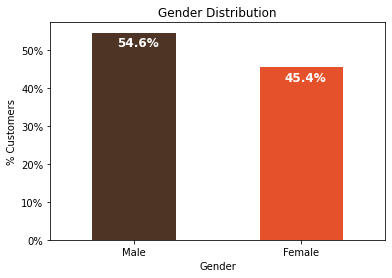

In [7]:
colors = ['#4D3425','#E4512B']
ax = (df['Gender'].value_counts()*100.0 /len(df)).plot(kind='bar',
stacked = True,
rot = 0,
color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers')
ax.set_xlabel('Gender')
ax.set_ylabel('% Customers')
ax.set_title('Gender Distribution')

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-3.5, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold')

As you can see, there are a bit more of Male customers than Female customers.

C:\Users\Christian\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, '# of Customers by their tenure')

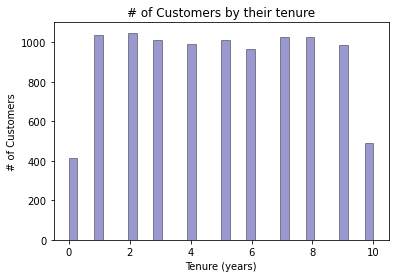

In [8]:
ax = sns.distplot(df['Tenure'], hist=True, kde=False, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (years)')
ax.set_title('# of Customers by their tenure')

For the tenure, we can observe that a lot of customers have stayed between 1 and 9 years with the bank, having few new clients and clients with 10 years tenure.

Text(0.5, 1.0, '# of Customers by their age')

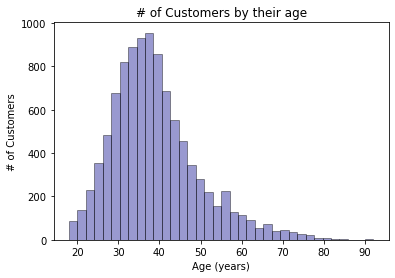

In [9]:
ax = sns.distplot(df['Age'], hist=True, kde=False, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set_ylabel('# of Customers')
ax.set_xlabel('Age (years)')
ax.set_title('# of Customers by their age')

About the age, we can see that the majority of customers have between 30 and 40 years.

Text(0.5, 1.0, '# of Customers by their balance')

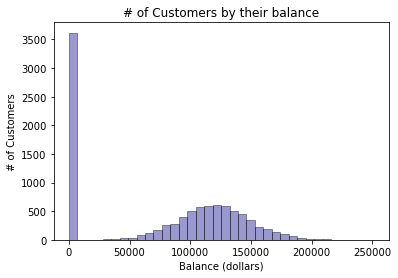

In [10]:
ax = sns.distplot(df['Balance'], hist=True, kde=False, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set_ylabel('# of Customers')
ax.set_xlabel('Balance (dollars)')
ax.set_title('# of Customers by their balance')

About the account balance, we can notice that a lot of people have no money in their bank accounts. In the other hand, the account balance of the people who do have money in the bank is very diverse.
Therefore, we can divide the customers in people with money in their accounts and people without funds.

Text(0.5, 1.0, '# of Customers by their estimated salary')

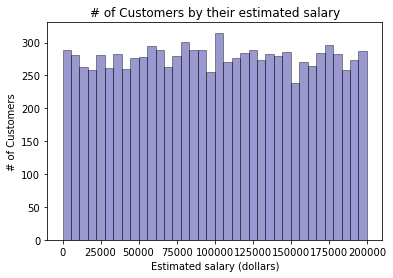

In [11]:
ax = sns.distplot(df['EstimatedSalary'], hist=True, kde=False, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set_ylabel('# of Customers')
ax.set_xlabel('Estimated salary (dollars)')
ax.set_title('# of Customers by their estimated salary')

As you can note, the estimated salary of the customers seem to be very diverse.

Text(0.5, 1.0, '# of Customers by their credit score')

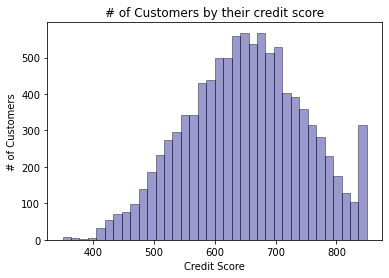

In [12]:
ax = sns.distplot(df['CreditScore'], hist=True, kde=False, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set_ylabel('# of Customers')
ax.set_xlabel('Credit Score')
ax.set_title('# of Customers by their credit score')

We can observe that a lot of customers have credit scores between 600 and 700, with a relatively big part having the maximum score (850).

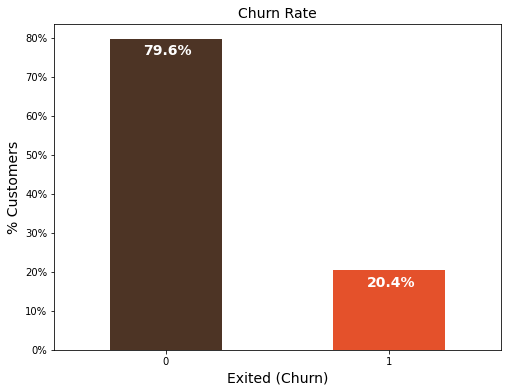

In [14]:
colors = ['#4D3425','#E4512B']
ax = (df['Exited'].value_counts()*100.0 /len(df)).plot(kind='bar',
                                                                           stacked = True,
                                                                          rot = 0,
                                                                          color = colors,
                                                                         figsize = (8,6))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers',size = 14)
ax.set_xlabel('Exited (Churn)',size = 14)
ax.set_title('Churn Rate', size = 14)

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-4.0, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold',
           size = 14)

About the churn rate, we can observe that approximately one fifth of the clients have withdrawn their account from the bank.

Text(0.5, 1.0, 'Distribution of Credit Score by churn')

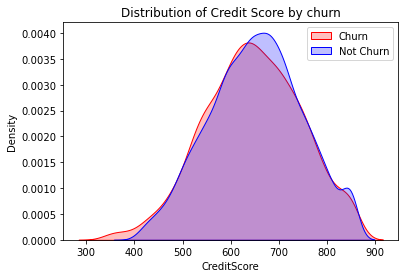

In [15]:
ax = sns.kdeplot(df.CreditScore[(df["Exited"] == 1) ],
                color="Red", shade = True)
ax = sns.kdeplot(df.CreditScore[(df["Exited"] == 0) ],
                ax =ax ,color="Blue", shade = True)
ax.legend(["Churn","Not Churn"],loc='upper right')
ax.set_title('Distribution of Credit Score by churn')

To notice if there is a significant correlation between churn rate and credit score, I plotted this graph that considers both properties. As you can see, there is not a big correlation, having clients of all types of credit scores staying and leaving at the bank.

Text(0.5, 1.0, 'Distribution of Balance by churn')

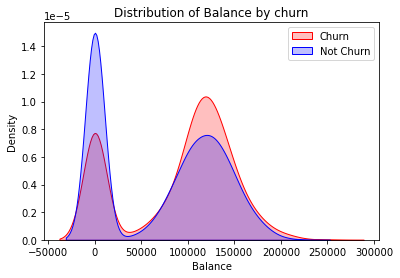

In [16]:
ax = sns.kdeplot(df.Balance[(df["Exited"] == 1) ],
                color="Red", shade = True)
ax = sns.kdeplot(df.Balance[(df["Exited"] == 0) ],
                ax =ax ,color="Blue", shade = True)
ax.legend(["Churn","Not Churn"],loc='upper right')
ax.set_title('Distribution of Balance by churn')

In the graph above, I plotted the correlation between churn and account balance, noticing that the majority of accounts without money is staying from the bank and a large accounts with funds are being withdrawn.
My take is that a lot of new young customers are creating new empty accounts, thus staying with the bank for the moment.

Text(0.5, 1.0, 'Distribution of Age by churn')

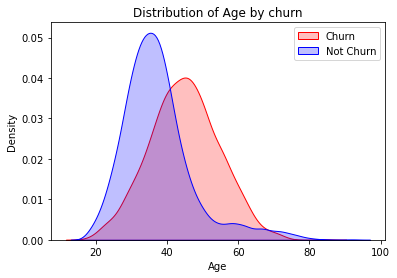

In [17]:
ax = sns.kdeplot(df.Age[(df["Exited"] == 1) ],
                color="Red", shade = True)
ax = sns.kdeplot(df.Age[(df["Exited"] == 0) ],
                ax =ax ,color="Blue", shade = True)
ax.legend(["Churn","Not Churn"],loc='upper right')
ax.set_title('Distribution of Age by churn')

Confirming our suspeciones, we can see that the people staying with the bank is younger and the clients withdrawing their accounts are older.

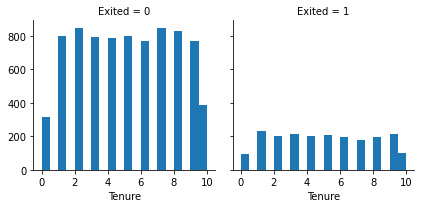

In [15]:
chart = sns.FacetGrid(df, col='Exited')
chart.map(plt.hist, 'Tenure', bins=20)

As you can observe above, we can see that the tenure (the years with the bank) has no significant correlation to the churn rate.

Now that we have analyzed the data, the next step is to clean our dataset, dropping rows with no value and grouping some data in brackets.

In [18]:
df = df.drop(['CustomerId'], axis=1)
df = df.drop(['RowNumber'], axis=1)
df = df.drop(['Surname'], axis=1)
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


Rows without value, such as Customer ID, row number and surnames are dropped.

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [21]:
df[["Exited", "Age"]].groupby(['Exited'], as_index=False).mean()

,Exited,Age
0,0,37.408389
1,1,44.837997


As you can see, the average age of the clients leaving is older than the ones who are staying.

In [22]:
df['EstSalBin'] = pd.qcut(df['EstimatedSalary'], 5)
df['AgeBin'] = pd.cut(df['Age'].astype(int), 5)
df['CreditScoreBin'] = pd.qcut(df['CreditScore'], 4)

Data with very diverse quantities is grouped in different branches for a better algorithm performance.

In [23]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,EstSalBin,AgeBin,CreditScoreBin
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,"(80238.34, 119710.038]","(32.8, 47.6]","(584.0, 652.0]"
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,"(80238.34, 119710.038]","(32.8, 47.6]","(584.0, 652.0]"
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,"(80238.34, 119710.038]","(32.8, 47.6]","(349.999, 584.0]"
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,"(80238.34, 119710.038]","(32.8, 47.6]","(652.0, 718.0]"
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,"(41050.736, 80238.34]","(32.8, 47.6]","(718.0, 850.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0,"(80238.34, 119710.038]","(32.8, 47.6]","(718.0, 850.0]"
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,"(80238.34, 119710.038]","(32.8, 47.6]","(349.999, 584.0]"
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1,"(41050.736, 80238.34]","(32.8, 47.6]","(652.0, 718.0]"
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,"(80238.34, 119710.038]","(32.8, 47.6]","(718.0, 850.0]"


In [24]:
df[["EstSalBin", "Exited"]].groupby(['EstSalBin'], as_index=False).mean().sort_values(by='Exited', ascending=False)

,EstSalBin,Exited
4,"(159836.726, 199992.48]",0.2155
2,"(80238.34, 119710.038]",0.2020
3,"(119710.038, 159836.726]",0.2020
0,"(11.579, 41050.736]",0.1995
1,"(41050.736, 80238.34]",0.1995


There seems to be no significant correlation between estimated salary and churn rate.

In [25]:
df[["AgeBin", "Exited"]].groupby(['AgeBin'], as_index=False).mean().sort_values(by='Exited', ascending=False)

,AgeBin,Exited
2,"(47.6, 62.4]",0.529978
3,"(62.4, 77.2]",0.214925
1,"(32.8, 47.6]",0.188182
0,"(17.926, 32.8]",0.076344
4,"(77.2, 92.0]",0.041667


We notice that the age group with the highest churn rate is people betwen 48 and 62 years, with almost 53% of them withdrawing their accounts.

In [26]:
df[["CreditScoreBin", "Exited"]].groupby(['CreditScoreBin'], as_index=False).mean().sort_values(by='Exited', ascending=False)

,CreditScoreBin,Exited
0,"(349.999, 584.0]",0.219416
1,"(584.0, 652.0]",0.210316
3,"(718.0, 850.0]",0.203004
2,"(652.0, 718.0]",0.181855


In [27]:
df['MoneyInAccount'] = pd.Series(np.where(df.Balance == 0.00, 0, 1),
          df.index)

Now, we classify the customers into 2 big groups: the ones who have money in their accounts and the ones who don't.

In [28]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,EstSalBin,AgeBin,CreditScoreBin,MoneyInAccount
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,"(80238.34, 119710.038]","(32.8, 47.6]","(584.0, 652.0]",0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,"(80238.34, 119710.038]","(32.8, 47.6]","(584.0, 652.0]",1
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,"(80238.34, 119710.038]","(32.8, 47.6]","(349.999, 584.0]",1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,"(80238.34, 119710.038]","(32.8, 47.6]","(652.0, 718.0]",0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,"(41050.736, 80238.34]","(32.8, 47.6]","(718.0, 850.0]",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0,"(80238.34, 119710.038]","(32.8, 47.6]","(718.0, 850.0]",0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,"(80238.34, 119710.038]","(32.8, 47.6]","(349.999, 584.0]",1
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1,"(41050.736, 80238.34]","(32.8, 47.6]","(652.0, 718.0]",0
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,"(80238.34, 119710.038]","(32.8, 47.6]","(718.0, 850.0]",1


In [29]:
df = df.drop(['Balance'], axis=1)
df = df.drop(['Age'], axis=1)
df = df.drop(['EstimatedSalary'], axis=1)
df = df.drop(['CreditScore'], axis=1)
df

,Geography,Gender,Tenure,NumOfProducts,HasCrCard,IsActiveMember,Exited,EstSalBin,AgeBin,CreditScoreBin,MoneyInAccount
0,France,Female,2,1,1,1,1,"(80238.34, 119710.038]","(32.8, 47.6]","(584.0, 652.0]",0
1,Spain,Female,1,1,0,1,0,"(80238.34, 119710.038]","(32.8, 47.6]","(584.0, 652.0]",1
2,France,Female,8,3,1,0,1,"(80238.34, 119710.038]","(32.8, 47.6]","(349.999, 584.0]",1
3,France,Female,1,2,0,0,0,"(80238.34, 119710.038]","(32.8, 47.6]","(652.0, 718.0]",0
4,Spain,Female,2,1,1,1,0,"(41050.736, 80238.34]","(32.8, 47.6]","(718.0, 850.0]",1
...,...,...,...,...,...,...,...,...,...,...,...
9995,France,Male,5,2,1,0,0,"(80238.34, 119710.038]","(32.8, 47.6]","(718.0, 850.0]",0
9996,France,Male,10,1,1,1,0,"(80238.34, 119710.038]","(32.8, 47.6]","(349.999, 584.0]",1
9997,France,Female,7,1,0,1,1,"(41050.736, 80238.34]","(32.8, 47.6]","(652.0, 718.0]",0
9998,Germany,Male,3,2,1,0,1,"(80238.34, 119710.038]","(32.8, 47.6]","(718.0, 850.0]",1


Now that we have the new rows divided in branches, we can drop the original data.

In [30]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

Now, data with text properties or in branches are encoded into numbers.

In [31]:
df['Gender_Code'] = label.fit_transform(df['Gender'])
df['Geography_Code'] = label.fit_transform(df['Geography'])
df['EstSalBin_Code'] = label.fit_transform(df['EstSalBin'])
df['AgeBin_Code'] = label.fit_transform(df['AgeBin'])
df['CreditScoreBin_Code'] = label.fit_transform(df['CreditScoreBin'])

In [32]:
df

,Geography,Gender,Tenure,NumOfProducts,HasCrCard,IsActiveMember,Exited,EstSalBin,AgeBin,CreditScoreBin,MoneyInAccount,Gender_Code,Geography_Code,EstSalBin_Code,AgeBin_Code,CreditScoreBin_Code
0,France,Female,2,1,1,1,1,"(80238.34, 119710.038]","(32.8, 47.6]","(584.0, 652.0]",0,0,0,2,1,1
1,Spain,Female,1,1,0,1,0,"(80238.34, 119710.038]","(32.8, 47.6]","(584.0, 652.0]",1,0,2,2,1,1
2,France,Female,8,3,1,0,1,"(80238.34, 119710.038]","(32.8, 47.6]","(349.999, 584.0]",1,0,0,2,1,0
3,France,Female,1,2,0,0,0,"(80238.34, 119710.038]","(32.8, 47.6]","(652.0, 718.0]",0,0,0,2,1,2
4,Spain,Female,2,1,1,1,0,"(41050.736, 80238.34]","(32.8, 47.6]","(718.0, 850.0]",1,0,2,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,France,Male,5,2,1,0,0,"(80238.34, 119710.038]","(32.8, 47.6]","(718.0, 850.0]",0,1,0,2,1,3
9996,France,Male,10,1,1,1,0,"(80238.34, 119710.038]","(32.8, 47.6]","(349.999, 584.0]",1,1,0,2,1,0
9997,France,Female,7,1,0,1,1,"(41050.736, 80238.34]","(32.8, 47.6]","(652.0, 718.0]",0,0,0,1,1,2
9998,Germany,Male,3,2,1,0,1,"(80238.34, 119710.038]","(32.8, 47.6]","(718.0, 850.0]",1,1,1,2,1,3


In [33]:
X_df = df[['Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'MoneyInAccount', 'Gender_Code', 'Geography_Code', 'EstSalBin_Code', 'AgeBin_Code', 'CreditScoreBin_Code']]

For the X values, we select the properties that will be used.

In [34]:
X_df

,Tenure,NumOfProducts,HasCrCard,IsActiveMember,MoneyInAccount,Gender_Code,Geography_Code,EstSalBin_Code,AgeBin_Code,CreditScoreBin_Code
0,2,1,1,1,0,0,0,2,1,1
1,1,1,0,1,1,0,2,2,1,1
2,8,3,1,0,1,0,0,2,1,0
3,1,2,0,0,0,0,0,2,1,2
4,2,1,1,1,1,0,2,1,1,3
...,...,...,...,...,...,...,...,...,...,...
9995,5,2,1,0,0,1,0,2,1,3
9996,10,1,1,1,1,1,0,2,1,0
9997,7,1,0,1,0,0,0,1,1,2
9998,3,2,1,0,1,1,1,2,1,3


In [35]:
y_df = df[['Exited']]

For the y array, we use the property we will be looking for, if the client has exited the bank.

In [36]:
y_df

,Exited
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


# Logistic Regression

Now, previous to the logistic regression algorithm, we divide the data in 2 groups: test and train, to effectively test the accuracy of each algorithm.

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.3, random_state=55)

In [39]:
X_train_b = np.c_[X_train]
y_train_b = np.c_[y_train]

Now, we do the logistic regression model:

In [47]:
model = LogisticRegression(solver='lbfgs', max_iter=60000, random_state=101)

In [48]:
model.fit(X_train_b, y_train_b.ravel())

LogisticRegression(max_iter=60000, random_state=101)

In [49]:
yhat = model.predict(X_test)

In [50]:
yhat.shape

(3000,)

In [51]:
y_test_b = np.c_[y_test].ravel()

In [52]:
model.coef_

array([[-0.01078033, -0.01520103,  0.01116018, -0.99143725,  0.67802752,
        -0.55659001,  0.10333282,  0.03371093,  0.90379189, -0.05314468]])

In [53]:
model.intercept_

array([-2.05471367])

In [54]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [55]:
confusion_matrix(y_test_b, yhat)

array([[2349,   39],
       [ 532,   80]], dtype=int64)

In [56]:
f1_score(y_test_b, yhat, average='micro')

0.8096666666666666

In [57]:
accuracy_score(y_test_b, yhat)

0.8096666666666666

In [58]:
model.score(X_train_b, y_train_b)

0.808

For this model, we obtain an accuracy of 80.96% and a score of 80.80%.
The difference between both metrics is that the accuracy uses the test data and score the train data.

In [59]:
coeff_df = pd.DataFrame(X_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(model.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)


,Feature,Correlation
8,CreditScoreBin_Code,0.903792
4,Gender_Code,0.678028
6,EstSalBin_Code,0.103333
7,AgeBin_Code,0.033711
2,IsActiveMember,0.011160
0,NumOfProducts,-0.010780
1,HasCrCard,-0.015201
5,Geography_Code,-0.556590
3,MoneyInAccount,-0.991437


# SVM

Now its the time for the Support Vector Machine.

In [61]:
from sklearn.svm import LinearSVC, SVC

In [62]:
model_svc = SVC()

In [63]:
model_svc.fit(X_train_b, y_train_b.ravel())

SVC()

In [64]:
y_pred_svc = model_svc.predict(X_test)

In [65]:
y_pred_svc.shape

(3000,)

In [66]:
confusion_matrix(y_test_b, y_pred_svc)

array([[2388,    0],
       [ 584,   28]], dtype=int64)

In [67]:
f1_score(y_test_b, y_pred_svc, average='micro')

0.8053333333333333

In [68]:
accuracy_score(y_test_b, y_pred_svc)

0.8053333333333333

In [69]:
model_svc.score(X_train_b, y_train_b)

0.805

After building the default model and testing the data, we obtain an accuracy of 80.53% and a score of 80.50%.

In [70]:
from sklearn.model_selection import GridSearchCV

Now, we will search across different models to obtain parameters for a more accurate algorithm.

In [71]:
param_grid = { "C": [0.1, 1, 10], "kernel": ["rbf", "poly"], 'gamma': [0.1, 0.01] }

In [72]:
grid = GridSearchCV(SVC(), param_grid, verbose = 3)

In [62]:
grid.fit(X_train_b, y_train_b.ravel())

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   1.2s
[CV 2/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   1.1s
[CV 3/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   1.1s
[CV 4/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   1.1s
[CV 5/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   1.1s
[CV 1/5] END ..................C=0.1, gamma=0.1, kernel=poly; total time=   1.7s
[CV 2/5] END ..................C=0.1, gamma=0.1, kernel=poly; total time=   1.5s
[CV 3/5] END ..................C=0.1, gamma=0.1, kernel=poly; total time=   1.6s
[CV 4/5] END ..................C=0.1, gamma=0.1, kernel=poly; total time=   1.6s
[CV 5/5] END ..................C=0.1, gamma=0.1, kernel=poly; total time=   1.7s
[CV 1/5] END ..................C=0.1, gamma=0.01, kernel=rbf; total time=   1.0s
[CV 2/5] END ..................C=0.1, gamma=0.01

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [0.1, 0.01],
                         'kernel': ['rbf', 'poly']},
             verbose=3)

In [63]:
grid.best_estimator_

SVC(C=10, gamma=0.1)

In [64]:
grid.best_params_

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

Now that the we have the best parameters, we build a new model and fit the data.

In [74]:
model_svc_best = SVC(C= 10, gamma= 0.1, kernel= 'rbf')

In [75]:
model_svc_best.fit(X_train_b, y_train_b.ravel())

SVC(C=10, gamma=0.1)

In [76]:
y_pred_svc_best = model_svc_best.predict(X_test)

In [77]:
confusion_matrix(y_test_b, y_pred_svc_best)

array([[2333,   55],
       [ 393,  219]], dtype=int64)

In [78]:
f1_score(y_test_b, y_pred_svc_best, average='micro')

0.8506666666666667

In [79]:
accuracy_score(y_test_b, y_pred_svc_best)

0.8506666666666667

In [80]:
model_svc_best.score(X_train_b, y_train_b)

0.868

We can notice a big improvement, with the accuracy of 85.06% and score of 86.80%.

# Decision Tree Classifier

Now its the turn for the decision tree classifier.

In [81]:
from sklearn.tree import DecisionTreeClassifier

In [82]:
tree_clf = DecisionTreeClassifier(
    max_depth=4, 
    random_state=2
)

In [83]:
tree_clf.fit(X_train_b, y_train_b.ravel())

DecisionTreeClassifier(max_depth=4, random_state=2)

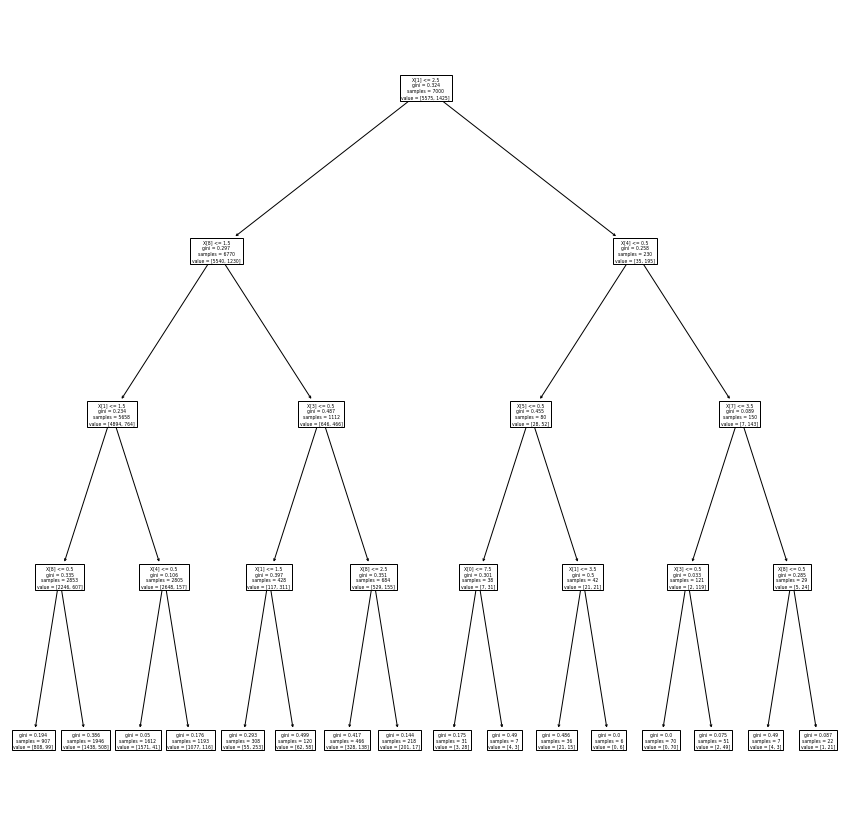

In [84]:
from sklearn import tree

plt.figure(figsize=(15, 15))
tree.plot_tree(tree_clf)
plt.show()

In [85]:
y_pred_tree = tree_clf.predict(X_test)

In [86]:
confusion_matrix(y_test_b, y_pred_tree)

array([[2356,   32],
       [ 426,  186]], dtype=int64)

In [87]:
f1_score(y_test_b, y_pred_tree, average='micro')

0.8473333333333334

In [88]:
accuracy_score(y_test_b, y_pred_tree)

0.8473333333333334

In [89]:
tree_clf.score(X_train_b, y_train_b)

0.8487142857142858

After fitting the data and plotting the tree, we obtain an accuracy of 84.73% and a score of 84.87%.

In [90]:
param_grid = { "max_depth": [1, 2, 3, 4, 5, 6, 7, 8]}

Now, we will search for a better number of tree depth to improve the algorithm.

In [91]:
grid = GridSearchCV(DecisionTreeClassifier(random_state=2), param_grid, verbose = 3)

In [92]:
grid.fit(X_train_b, y_train_b.ravel())

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END ....................................max_depth=1; total time=   0.0s
[CV 2/5] END ....................................max_depth=1; total time=   0.0s
[CV 3/5] END ....................................max_depth=1; total time=   0.0s
[CV 4/5] END ....................................max_depth=1; total time=   0.0s
[CV 5/5] END ....................................max_depth=1; total time=   0.0s
[CV 1/5] END ....................................max_depth=2; total time=   0.0s
[CV 2/5] END ....................................max_depth=2; total time=   0.0s
[CV 3/5] END ....................................max_depth=2; total time=   0.0s
[CV 4/5] END ....................................max_depth=2; total time=   0.0s
[CV 5/5] END ....................................max_depth=2; total time=   0.0s
[CV 1/5] END ....................................max_depth=3; total time=   0.0s
[CV 2/5] END ....................................

GridSearchCV(estimator=DecisionTreeClassifier(random_state=2),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8]}, verbose=3)

In [93]:
grid.best_estimator_

DecisionTreeClassifier(max_depth=5, random_state=2)

In [94]:
grid.best_params_

{'max_depth': 5}

It seems that the best number of maximum depth is 5, one more than the 4 we previosly had.

In [95]:
tree_clf_best = DecisionTreeClassifier(
    max_depth=5, 
    random_state=2
)

In [96]:
tree_clf_best.fit(X_train_b, y_train_b.ravel())

DecisionTreeClassifier(max_depth=5, random_state=2)

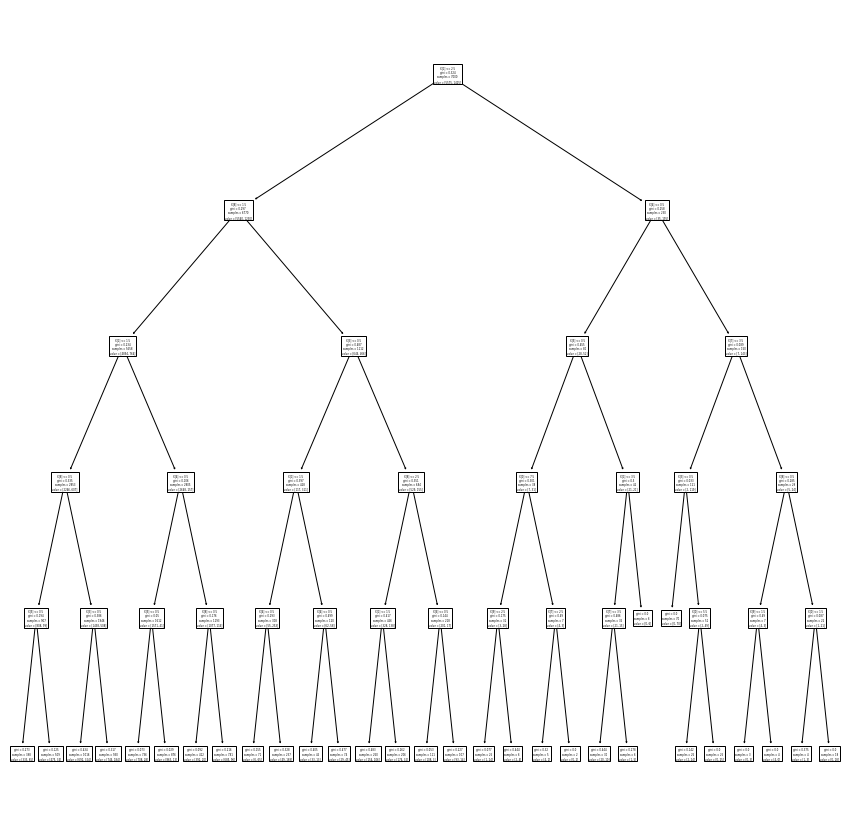

In [97]:
plt.figure(figsize=(15, 15))
tree.plot_tree(tree_clf_best)
plt.show()

In [98]:
y_pred_tree_best = tree_clf_best.predict(X_test)

In [99]:
confusion_matrix(y_test_b, y_pred_tree_best)

array([[2350,   38],
       [ 403,  209]], dtype=int64)

In [100]:
f1_score(y_test_b, y_pred_tree_best, average='micro')

0.853

In [101]:
accuracy_score(y_test_b, y_pred_tree_best)

0.853

In [102]:
tree_clf_best.score(X_train_b, y_train_b)

0.8522857142857143

After fitting the data with the new parameter, we obtain an accuracy of 85.30% and a score of 85.22%.

# Results

### Best method: Decision Tree Classifier w/ 5 depth

#### Accuracy: 85.3%
#### Score: 85.22%

The best method for solving this churn rate problem was the Decision Tree Classifier with 5 max depth. Despite having lower score than the enhanced SVM, the decision tree has a better accuracy predicting the test data. Being accuracy the best measure to rate the algorithms, Decision Tree is the winner.

# Predict clients churn

Now that we have the models, we can test them by predicting a few particular customer cases.

In [111]:
Clientes = []
Clientes.append([4, 2, 1, 1, 1, 1, 2, 2, 0, 0])
#4 years tenure
#2 products
#1 has credit card
#1 is active member
#1 has money in account
#1 male
#2 from Spain
#2 estimated salary from 80,238 to 119,710
#0 age from 17 to 32 (young)
#0 Credit Score from 350 to 584 (low)

For the first dummy client, we have a young spanish male who has a credit card and uses 2 bank products, he is an active member of the bank and has an estimated salary of $100,000~. He has been client for 4 years and has a current low credit score.

In [112]:
Clientes.append([1, 0, 0, 0, 0, 1, 0, 0, 3, 0])
#1 years tenure
#0 products
#0 has credit card
#0 is active member
#0 has money in account
#1 male
#0 from France
#0 estimated salary from 11,500 to 41,050
#3 age from 62 to 77 (2nd oldest gap)
#0 Credit Score from 350 to 584 (low)

For the second client, we have an elder French male who barely uses his account and has no money in it, he has a very low estimated salary and low credit score.

In [113]:
Clientes.append([1, 0, 0, 0, 0, 1, 0, 0, 0, 0])
#1 years tenure
#0 products
#0 has credit card
#0 is active member
#0 has money in account
#1 male
#0 from France
#0 estimated salary from 11,500 to 41,050
#0 age from 17 to 32 (young)
#0 Credit Score from 350 to 584 (low)

For the third client, we use the exact same parameters as the previous with the exception of the age, he is a young man, so he probably created his bank account and currently has no money in it, but eventually he will.

In [114]:
model.predict(Clientes)

array([0, 1, 0], dtype=int64)

In [115]:
model_svc.predict(Clientes)

array([0, 1, 0], dtype=int64)

In [116]:
model_svc_best.predict(Clientes)

array([0, 1, 0], dtype=int64)

In [117]:
tree_clf.predict(Clientes)

array([0, 1, 0], dtype=int64)

In [118]:
tree_clf_best.predict(Clientes)

array([0, 1, 0], dtype=int64)

As you can notice, in every prediction the algorithms show that the second client has exited the bank or he soon will withdraw his account, while the other two will remain with the company.

# Conclusion

As you have noticed in this project, we can use different algorithms to predict if a client will remain in the company or leave it. This type of algorithms using churn rate could be very important to companies who manage suscriptions, contracts and accounts, such as streaming services, banking corporations, telecommunication providers and insurance companies.

Knowing when a client is very close to exiting the company can be very important to guarantee that customers stays in the company, therefore significantly reducing the Churn Rate.

# References

O'Reilly - Hands-on Machine Learning with Scikit-Learn, Keras, and TensorFlow (2nd edition, 2019)

https://www.investopedia.com/terms/c/churnrate.asp

https://www.iebschool.com/blog/que-es-churn-rate-marketing-digital/

https://www.kaggle.com/omeryasirkucuk/calculation-accuracy-score-w-bank-churn-dataset/data

This project was made by <a href="https://mx.linkedin.com/in/christian-cabral-peniche-089bbb1b8">Christian Cabral</a> for the subject of Business Intelligence taught by <a href="https://www.linkedin.com/in/novelo-luis/">Luis Novelo</a> at Universidad Modelo.